## Load Dataset

In [1]:
import pandas as pd
df= pd.read_csv('train.csv')

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Clean Dataset

In [3]:
y = df['Survived']

In [4]:
X = df.drop(['PassengerId','Name','Ticket','Cabin','Embarked'],axis=1)
X

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [6]:
X['Age'].median()

28.0

In [7]:
X['Age']= X['Age'].fillna(X['Age'].median())

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [9]:
X

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,28.0,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


## Preprocess Data

In [10]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
X['Sex']= le.fit_transform(X['Sex'])
X

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000
887,1,1,0,19.0,0,0,30.0000
888,0,3,0,28.0,1,2,23.4500
889,1,1,1,26.0,0,0,30.0000


## Ananlysis

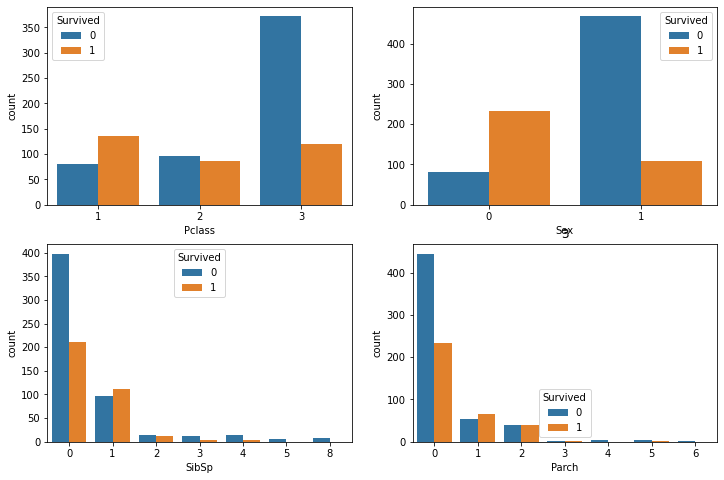

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = ["Pclass","Sex","SibSp","Parch"]

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs = axs.ravel()

for i, col in enumerate(columns):
    sns.countplot(data=X, x=col, ax=axs[i],hue='Survived')
    plt.title(i)
    
plt.show()

In [12]:
X=X.drop(['Survived'],axis=1)

In [13]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000
887,1,0,19.0,0,0,30.0000
888,3,0,28.0,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [14]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

## Spliting

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

## Without gridsearch cv

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report


In [17]:

for i in range(10,30,2):
    
    print('K',i)
    
    # initialization
    neigh = KNeighborsClassifier(n_neighbors=i)
    
    # Training
    neigh.fit(X_train, y_train)
    
    # Test the training data
    y_pred_train = neigh.predict(X_train)
    accuracy_train = accuracy_score(y_pred_train,y_train)
    f1_train = f1_score(y_pred_train,y_train)
   
    # Test the test data
    y_pred_test = neigh.predict(X_test)
    accuracy_test = accuracy_score(y_pred_test,y_test)
    f1_test = f1_score(y_pred_test,y_test)
   
    print(accuracy_train,accuracy_test)
    print(f1_train,f1_test)
    print()

K 10
0.7335473515248796 0.7052238805970149
0.5990338164251207 0.4968152866242039

K 12
0.7287319422150883 0.7350746268656716
0.5947242206235012 0.5696969696969697

K 14
0.7255216693418941 0.7238805970149254
0.5756823821339951 0.5375

K 16
0.7191011235955056 0.7164179104477612
0.5679012345679013 0.525

K 18
0.7110754414125201 0.7313432835820896
0.5631067961165049 0.5555555555555557

K 20
0.7303370786516854 0.7388059701492538
0.5862068965517242 0.5679012345679013

K 22
0.723916532905297 0.7425373134328358
0.5700000000000001 0.5714285714285714

K 24
0.7191011235955056 0.7238805970149254
0.5524296675191817 0.5375

K 26
0.7110754414125201 0.7014925373134329
0.5263157894736842 0.4805194805194805

K 28
0.7046548956661316 0.7126865671641791
0.5106382978723405 0.48322147651006714



## Modeling

In [18]:


parameters = {'n_neighbors':list(range(10,30,2))}
neigh = KNeighborsClassifier()

clf = GridSearchCV(neigh, parameters)
clf.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [10, 12, 14, 16, 18, 20, 22, 24, 26,
                                         28]})

In [19]:
clf.best_params_

{'n_neighbors': 18}

## Modeling using best parameter

In [20]:
# initialization
neigh = KNeighborsClassifier(n_neighbors=22)

# Training
neigh.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=22)

# Naive Bayes


In [40]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB(var_smoothing=0.001)
clf.fit(X_train, y_train)
neigh = clf

## Evaluation

In [41]:
y_pred_train = neigh.predict(X_train)
f1_train = f1_score(y_pred_train,y_train)
print(f1_train)
print(classification_report(y_pred_train, y_train, target_names=[' Not Survived','Survived']))

0.35220125786163525
               precision    recall  f1-score   support

 Not Survived       0.95      0.66      0.78       547
     Survived       0.23      0.74      0.35        76

     accuracy                           0.67       623
    macro avg       0.59      0.70      0.57       623
 weighted avg       0.86      0.67      0.73       623



In [42]:
y_pred_test = neigh.predict(X_test)
f1_test = f1_score(y_pred_test,y_test)
print(f1_test)
print(classification_report(y_pred_test, y_test, target_names=['Not Survived','Survived']))

0.3787878787878788
              precision    recall  f1-score   support

Not Survived       0.96      0.68      0.80       236
    Survived       0.25      0.78      0.38        32

    accuracy                           0.69       268
   macro avg       0.60      0.73      0.59       268
weighted avg       0.87      0.69      0.75       268



In [23]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

array([[337, 128],
       [ 44, 114]], dtype=int64)

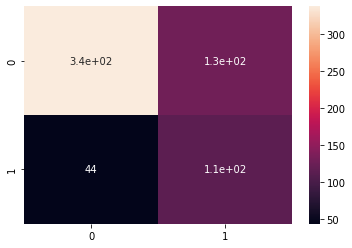

In [24]:
from sklearn.metrics import confusion_matrix
c= confusion_matrix(y_pred_train, y_train)
import seaborn as sns
sns.heatmap(c, annot=True)
c

array([[153,  54],
       [ 15,  46]], dtype=int64)

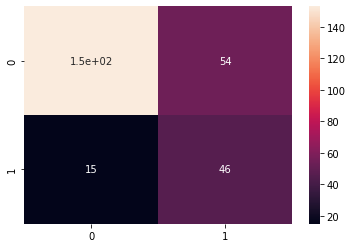

In [25]:
from sklearn.metrics import confusion_matrix
c= confusion_matrix(y_pred_test, y_test)
import seaborn as sns
sns.heatmap(c, annot=True)
c